In [114]:
import logging
logging.basicConfig(
    level=logging.DEBUG, 
    format='%(asctime)s,%(msecs)d %(levelname)-8s [%(lineno)d] %(message)s')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 20)
from matplotlib import ticker

Populating the interactive namespace from numpy and matplotlib


In [7]:
freq_prev_verb = pd.read_csv('/home/makrai/repo/hungarian_verbal_complex/freqPrevFin.txt', sep=' ', header=None, 
                             names=['freq', 'prev_verb'])

In [8]:
freq_prev_verb.head()


,freq,prev_verb
0,292019,el+mond
1,145257,el+fogad
2,141467,ki+derül
3,124530,meg+jelenik
4,104184,hozzá+tesz


In [15]:
freq_prev_verb['prev'], freq_prev_verb['verb'] = zip(*freq_prev_verb.prev_verb.str.split('+', n=1))

In [17]:
freq_prev_verb.head()

,freq,prev_verb,prev,verb
0,292019,el+mond,el,mond
1,145257,el+fogad,el,fogad
2,141467,ki+derül,ki,derül
3,124530,meg+jelenik,meg,jelenik
4,104184,hozzá+tesz,hozzá,tesz


In [101]:
marg = [None, None]
index = [None, None]
for i, mode in enumerate(['prev', 'verb']):
    marg[i] = freq_prev_verb.groupby(mode).sum().sort_values(by='freq', ascending=False)
    index[i] = {morph: i for i, morph in enumerate(marg[i].index)}

In [174]:
mx = np.zeros((len(marg[0]), len(marg[1])))
for _, record in freq_prev_verb.iterrows():
    freq_str, _, prev, verb = record
    mx[index[0][prev], index[1][verb]] = int(freq_str)

In [173]:
# Mutual information
if False:
    mx /= marg[0]
    mx /= marg[1].T

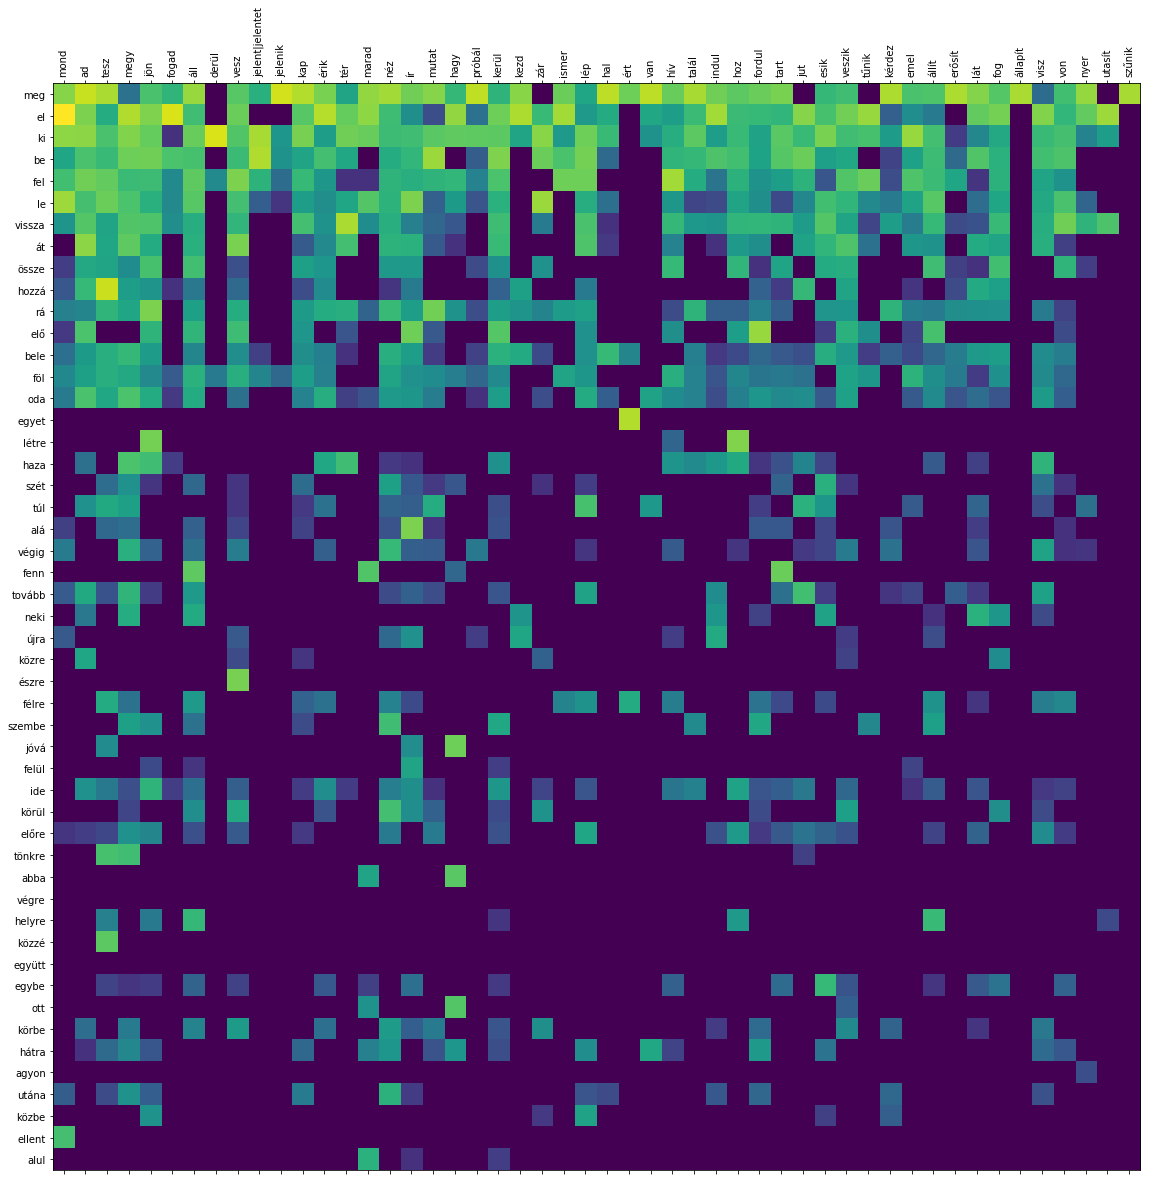

In [175]:
def show_most_freq(x_limit, y_limit):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(np.log(mx[:x_limit,:50]+1))#, interpolation='nearest')
    #fig.colorbar(cax)
    ax.set_xticklabels([''] + marg[1].index)
    ax.set_yticklabels([''] + marg[0].index)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.set_xticks(np.arange(x_limit))
    ax.set_yticks(np.arange(y_limit))
    #ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    
show_most_freq(50, 50)

In [154]:
marg[1].index

Index(['mond', 'ad', 'tesz', 'megy', 'jön', 'fogad', 'áll', 'derül', 'vesz',
       'jelent|jelentet',
       ...
       'kormányozhat', 'fuvaroz', 'nitrátosodik', 'urazik', 'állapítódik',
       'állat', 'uralg', 'koptathat', 'cserkész', 'hámlaszt'],
      dtype='object', name='verb', length=8000)

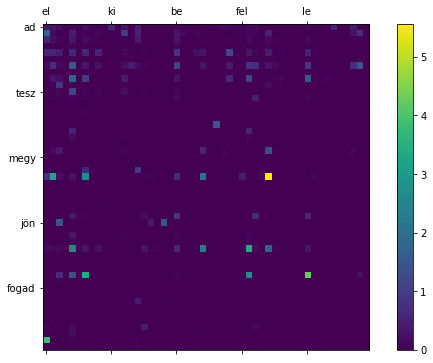

In [103]:
ax.set_xticklabels(['']+marg[0].index[:50])
ax.set_yticklabels(['']+marg[1].index[:50])

plt.show()

In [52]:
    print(int(freq_str))

292019
145257
141467
124530
104184
100036
88070
83859
83800
72708
70099
67098
66241
63742
62142
61257
61245
60016
59740
59315
56773
56312
54925
50534
50408
50386
49911
47380
47219
46135
44029
43596
43547
42286
42007
41663
40878
40477
39331
38081
37990
37812
37297
37254
36563
34977
34372
34306
33532
33306
33227
33071
32825
32781
32180
31663
31173
31014
31001
30352
30041
29912
29635
29630
29121
28778
28443
28411
27569
27472
26498
26484
25499
25016
24993
24829
24807
24589
24384
24207
24163
23760
23694
23649
23512
23282
22883
22723
22530
22494
22409
21906
21781
21588
21575
21456
21446
21428
21367
20918
20905
20636
20499
20268
20189
20144
20066
19894
19755
19418
19277
19269
19159
19126
18974
18948
18898
18888
18631
18558
18459
18418
18405
18397
18343
18322
18295
18155
18116
17979
17869
17804
17629
17618
17551
17547
17490
17411
17402
17257
17076
17023
16960
16938
16913
16765
16657
16597
16568
16086
16031
16019
15928
15818
15737
15678
15562
15331
15255
15147
15100
14925
14890
14778
14614
1459

1013
1012
1011
1011
1010
1010
1010
1009
1009
1008
1007
1007
1006
1005
1004
1003
1003
1002
1000
999
996
996
995
993
993
993
992
992
991
991
989
989
988
988
988
987
987
982
982
982
981
981
981
980
980
980
979
979
979
979
978
977
976
976
976
974
974
974
974
973
972
970
969
967
967
964
962
960
959
957
957
957
954
953
953
952
951
949
949
949
948
948
946
946
944
944
944
943
943
942
940
940
940
939
939
939
938
938
938
937
937
937
937
936
936
935
935
934
934
933
933
932
932
931
931
931
930
930
929
929
929
929
927
927
926
926
926
925
925
925
924
923
922
922
918
917
916
915
915
915
915
915
913
913
913
910
910
909
909
908
908
907
906
906
905
905
904
904
904
904
901
901
901
900
900
899
899
898
898
897
897
896
895
895
893
892
892
892
891
891
891
890
890
889
888
887
887
887
886
886
886
886
885
885
885
885
884
884
884
883
883
883
881
881
879
875
875
872
872
871
871
871
870
870
870
869
868
867
866
866
865
864
864
863
863
863
861
860
860
859
859
859
858
858
857
856
855
855
855
854
854
853
853
853
853
8

157
157
157
157
157
157
157
157
157
157
157
157
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
156
155
155
155
155
155
155
155
155
155
155
155
155
155
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
154
153
153
153
153
153
153
153
153
153
153
153
153
153
153
153
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
152
151
151
151
151
151
151
151
151
151
151
151
151
151
151
151
151
151
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
149
149
149
149
149
149
149
149
149
149
149
149
149
149
149
149
149
149
148
148
148
148
148
148
148
148
148
148
148
148
148
148
148
148
148
148
148
147
147
147
147
147
147
147
147
147
147
147
147
147
147
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
145
145
145
145
145
145
145
145
145
145
145
145
145
145
145
145
145
144
144
144
144


51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
4

23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
2

13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
1

8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
7
7
7
7
7
7
7


5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
